# EDA Análisis de juegos de Steam

En esta sección, exploramos el comportamiento de consumo de los usuarios de Steam para entender cómo interactúan con sus bibliotecas de juegos. El objetivo es responder a preguntas clave que guiarán la construcción de nuestro sistema de recomendación:

- ¿Cuál es la tasa de "Abandono de Biblioteca"?
- ¿Cuáles son los "Pilares de Engagement" de la plataforma?¿Cuál es el Top 10 de juegos con más horas?
- ¿Cómo se distribuye la intensidad de juego entre los usuarios?
- ¿Qué tan disperso es nuestro catálogo?


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from pathlib import Path

import os
import warnings
warnings.filterwarnings('ignore')

### Configuración de los gráficos

In [2]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["figure.titlesize"] = 24
plt.rcParams["axes.titleweight"] = "bold"

### Carga de los datos de Steam

In [3]:
data_folder = Path("../data/raw")
datos = data_folder / "steam-200k.csv"


### Creación ruta imagenes y reportes

In [4]:
img_folder = Path("../src/visualization")
report_folder = Path("../reports")

### Insights

In [5]:
insights = {}

### Análisis del dataset

In [6]:
from steam_analisis.iniciar_dataframe import informacion_df

df = informacion_df(datos)

▶ Head (5 filas):


,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


▶ Tail (5 filas):


,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0
199998,128470551,RUSH,play,1.4,0



▶ Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
 4   0                           199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB

▶ Dimensiones (shape):
(199999, 5)

▶ Columnas:
['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0']

▶ Descripción estadística (describe numérico):


,151603712,1.0,0
count,1.999990e+05,199999.000000,199999.0
mean,1.036556e+08,17.874468,0.0
std,7.208084e+07,138.057292,0.0
min,5.250000e+03,0.100000,0.0
25%,4.738420e+07,1.000000,0.0
50%,8.691201e+07,1.000000,0.0
75%,1.542309e+08,1.300000,0.0
max,3.099031e+08,11754.000000,0.0



▶ Tipos de datos:
151603712                       int64
The Elder Scrolls V Skyrim     object
purchase                       object
1.0                           float64
0                               int64
dtype: object


In [7]:
df

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


### Limpieza de datos y renombre de columnas

In [8]:
#renombro las columnas para que sean más detalladas

df.rename(columns={
    "151603712": "user-id",
    "The Elder Scrolls V Skyrim": "game-title",
    "purchase": "action",
    "1.0":"value"
}, inplace=True)

In [9]:
#elimino la ultima columna que no aportaba información
df.drop(df.columns[-1], axis=1,inplace=True)

In [10]:
#Cuento los datos nulos del dataset
df.isna().sum()

user-id       0
game-title    0
action        0
value         0
dtype: int64

In [11]:
#cuento las filas duplicadas
df.duplicated().sum()

df_duplicados = df[df.duplicated(keep=False)]
df_duplicados

,user-id,game-title,action,value
1786,11373749,Sid Meier's Civilization IV,purchase,1.0
1967,11373749,Sid Meier's Civilization IV,purchase,1.0
1968,11373749,Sid Meier's Civilization IV Beyond the Sword,purchase,1.0
1969,11373749,Sid Meier's Civilization IV Beyond the Sword,purchase,1.0
1970,11373749,Sid Meier's Civilization IV Warlords,purchase,1.0
...,...,...,...,...
195814,112845094,Grand Theft Auto III,purchase,1.0
195820,112845094,Grand Theft Auto San Andreas,purchase,1.0
195821,112845094,Grand Theft Auto Vice City,purchase,1.0
195822,112845094,Grand Theft Auto Vice City,purchase,1.0


Tenemos varias filas de duplicadas, eliminare unicamente las de action = purchase, ya que por usuario se compro una sola vez el juego

In [12]:
# Mantiene la primera ocurrencia de cada compra de un usuario
df = df.drop_duplicates(subset=['user-id', 'game-title', 'action'], keep='first')
df

,user-id,game-title,action,value
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9
...,...,...,...,...
199994,128470551,Titan Souls,play,1.5
199995,128470551,Grand Theft Auto Vice City,purchase,1.0
199996,128470551,Grand Theft Auto Vice City,play,1.5
199997,128470551,RUSH,purchase,1.0


In [13]:
df.duplicated().sum()

np.int64(0)

Elimino todas las filas duplicadas

### Análisis por juego y horas jugadas

In [14]:
#agrupar por juego y la cantidad de horas jugadas para ver que juegos son los mas jugados
df_juego_jugado = df[df["action"]=="play"].groupby("game-title")["value"].sum().reset_index()

In [15]:
df_juego_jugado

,game-title,value
0,007 Legends,0.7
1,0RBITALIS,1.2
2,1... 2... 3... KICK IT! (Drop That Beat Like a...,20.0
3,10 Second Ninja,5.9
4,"10,000,000",3.6
...,...,...
3595,rymdkapsel,1.1
3596,sZone-Online,56.7
3597,the static speaks my name,2.0
3598,theHunter,309.2


- ¿Qué tan disperso es nuestro catálogo?

In [16]:
print(f'La cantidad de juegos que tienen horas jugadas son {len(df_juego_jugado)}')

La cantidad de juegos que tienen horas jugadas son 3600


- ¿Cuáles son los "Pilares de Engagement" de la plataforma?¿Cuál es el Top 10 de juegos con más horas?

In [17]:
top_10_juegos_jugados=df_juego_jugado.sort_values(by="value", ascending=False).head(10)
top_10_juegos_jugados

,game-title,value
922,Dota 2,981684.6
673,Counter-Strike Global Offensive,322771.6
2994,Team Fortress 2,173673.3
670,Counter-Strike,134261.1
2691,Sid Meier's Civilization V,99821.3
675,Counter-Strike Source,96075.5
3067,The Elder Scrolls V Skyrim,70889.3
1313,Garry's Mod,49725.3
490,Call of Duty Modern Warfare 2 - Multiplayer,42009.9
1733,Left 4 Dead 2,33596.7


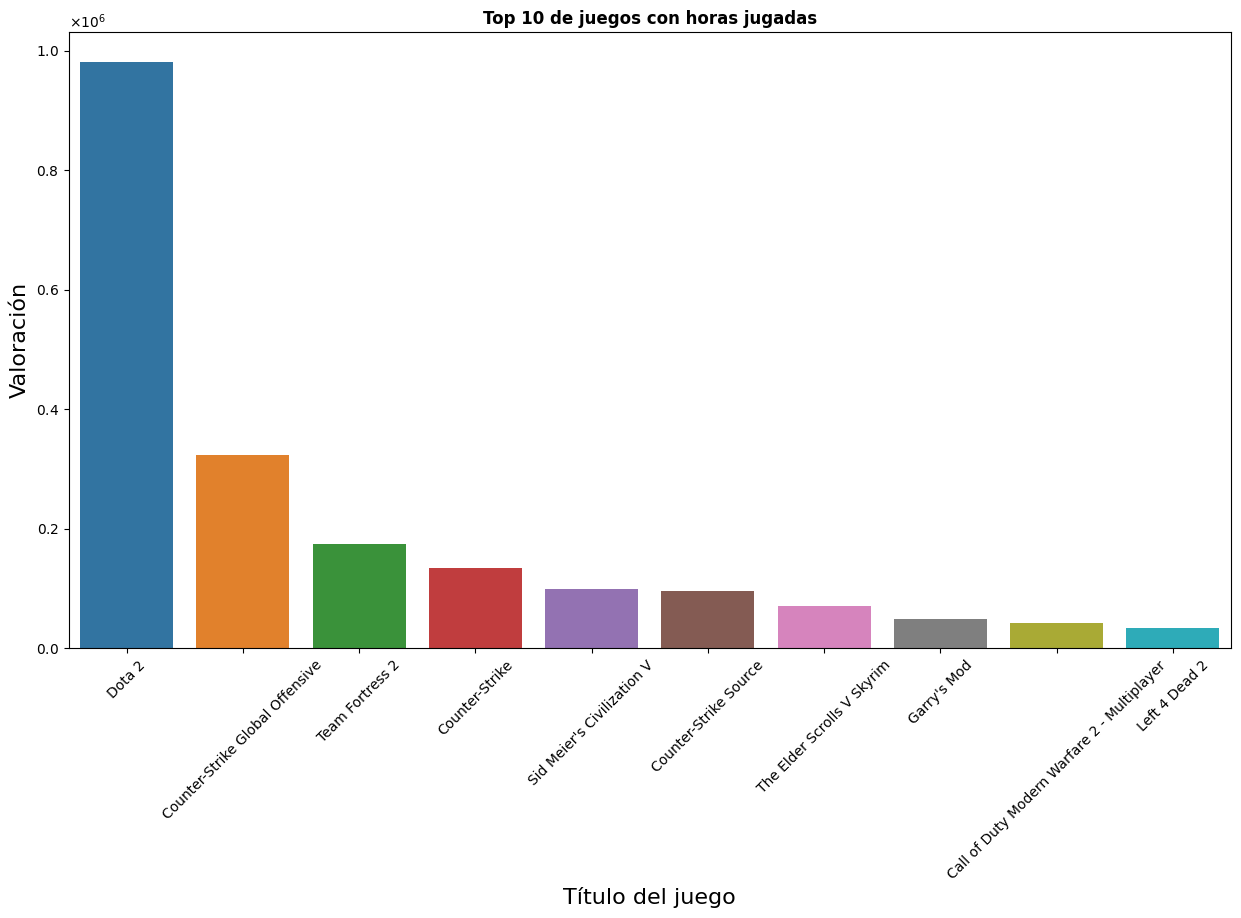

In [18]:
sns.barplot(data=top_10_juegos_jugados, x="game-title", y="value", hue="game-title")
plt.title("Top 10 de juegos con horas jugadas")
plt.xticks(rotation=45)
plt.xlabel("Título del juego", fontsize=16)
plt.ylabel("Valoración", fontsize=16)

nombre_top10 = "Top10_juegos_jugados.png"

plt.savefig( img_folder / nombre_top10)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


insights[nombre_top10]="Dota2 es sin dudas el juego con mas cantidad de horas jugadas."

plt.show()
plt.close()

- ¿Cómo se distribuye la intensidad de juego entre los usuarios?

In [19]:
df[df["action"]=="play"]["value"].describe

<bound method NDFrame.describe of 0         273.0
2          87.0
4          14.9
6          12.1
8           8.9
          ...  
199990      2.4
199992      2.2
199994      1.5
199996      1.5
199998      1.4
Name: value, Length: 70477, dtype: float64>

In [20]:
df[df["action"]=="play"]["value"].max()

np.float64(11754.0)

In [21]:
idx_max = df[df["action"]=="play"]["value"].idxmax()

registro = df.loc[idx_max]
registro

user-id                         73017395
game-title    Sid Meier's Civilization V
action                              play
value                            11754.0
Name: 123725, dtype: object

In [22]:
#percentiles
hardcore_player = df[df["action"]=="play"]["value"].quantile(0.90)
promedio_player =  df[df["action"]=="play"]["value"].quantile(0.50)
casual_player =  df[df["action"]=="play"]["value"].quantile(0.25)

print(f"El umbral para ser un jugador hardcore es: {hardcore_player}hs")
print(f'El jugador promedio juega: {promedio_player}hs')
print(f'El jugador casual juega: {casual_player}hs')

El umbral para ser un jugador hardcore es: 76.0hs
El jugador promedio juega: 4.5hs
El jugador casual juega: 1.0hs


Al analizar la distribución de horas, observamos que el 90% de los usuarios juegan menos de 76 hs a un titulo dado. Por lo tanto definiremos como jugadores hardcore a aquellos que superen este umbral, ya que representan el top 10% de compromiso(engagement) en la plataforma.

In [23]:
df["tipo_jugador"] = None

mask = df["action"] == "play"

df.loc[mask,"tipo_jugador"] = np.where(df.loc[mask, "value"] > hardcore_player, "hardcore",
                              np.where((df.loc[mask, "value"] <= hardcore_player) & (df.loc[mask, "value"] >= promedio_player), "promedio","casual"))

In [24]:
df.head(5)

,user-id,game-title,action,value,tipo_jugador
0,151603712,The Elder Scrolls V Skyrim,play,273.0,hardcore
1,151603712,Fallout 4,purchase,1.0,None
2,151603712,Fallout 4,play,87.0,hardcore
3,151603712,Spore,purchase,1.0,None
4,151603712,Spore,play,14.9,promedio


In [25]:
#hago un df de la cantidad de tipos de jugadores
df_tipo_jugador = df["tipo_jugador"].value_counts().reset_index()
df_tipo_jugador

,tipo_jugador,count
0,casual,35141
1,promedio,28335
2,hardcore,7001


Observamos que hay mucha cantidad de jugadores casuales, que ingresan 1 hs o menos.

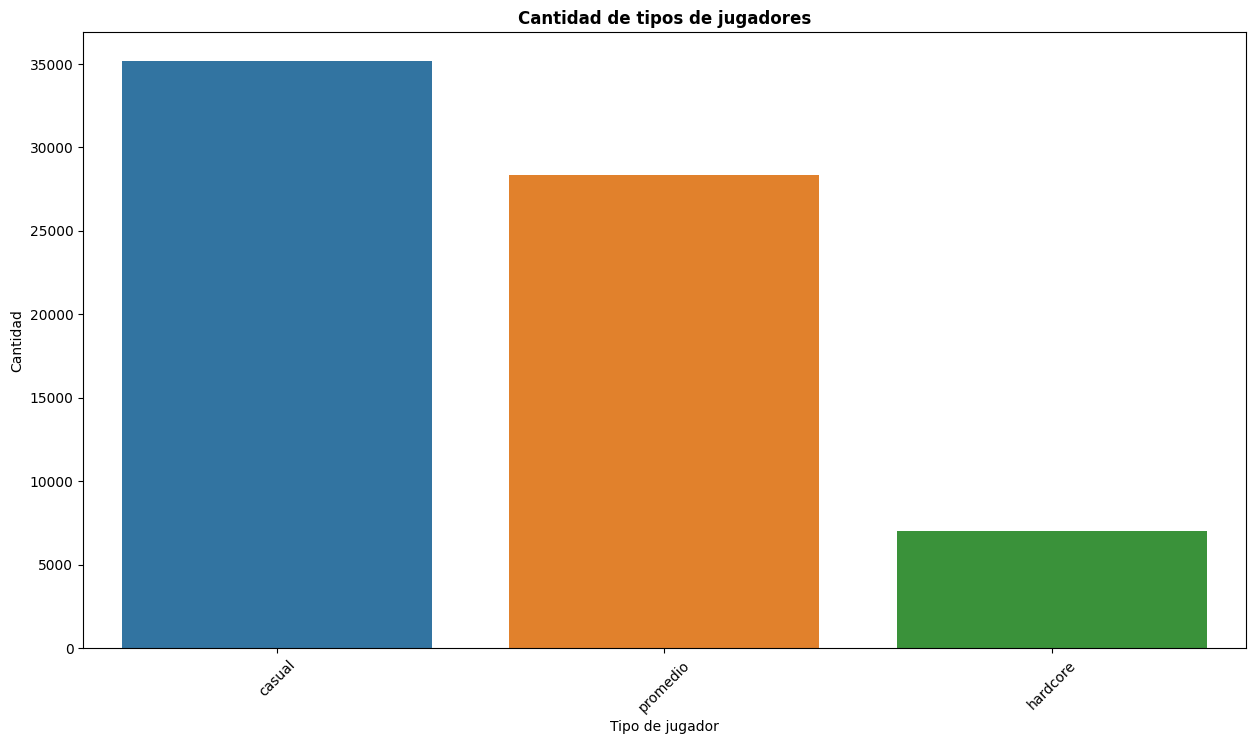

In [26]:
sns.barplot(data=df_tipo_jugador, x="tipo_jugador", y="count", hue="tipo_jugador")
plt.xlabel("Tipo de jugador")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

nombre_cantidad = "cantidad_tipo_jugadores.png"

plt.title("Cantidad de tipos de jugadores")
plt.savefig(img_folder / nombre_cantidad)

insights[nombre_cantidad]=" Hay una tendencia de muchos jugadores son los que compran el juego y sus horas de juegos son casuales. Los jugadores hardcore son los menos."

plt.show()
plt.close()

- ¿Cuál es la tasa de "Abandono de Biblioteca"?

In [27]:
#determinar cuantos juegos son comprados pero no tienen horas de juegos

serie_juegos_comprados = (df["action"]=="purchase").sum()
serie_juegos_menos_1hr = (df[(df["action"] == "play") & (df["value"] <= 1)]).shape[0]

juegos_comprados_sin_horas = round((serie_juegos_menos_1hr/serie_juegos_comprados )*100,2)

print(f"El porcentaje de juegos que fueron comprados y no superan la hora de juego es de: {juegos_comprados_sin_horas}%")

El porcentaje de juegos que fueron comprados y no superan la hora de juego es de: 13.85%


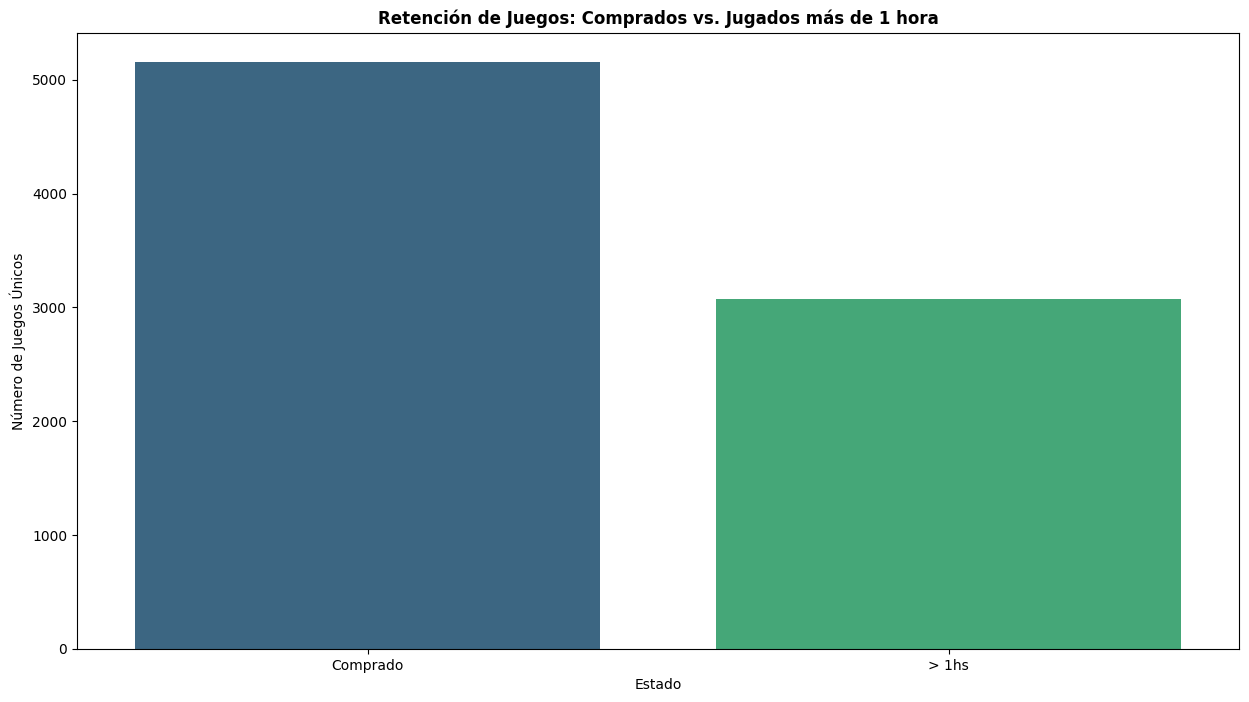

In [28]:
#hacer graficos de cuantos juegos se compraron y cuantos juegos de esos pasaron la 1 hs de juego

df_juegos_comprados =df[df["action"]=="purchase"]
df_juegos_con_horas = df[(df["action"]=="play") & (df["value"] >= 1)]

total_comprados = df_juegos_comprados["game-title"].nunique()
total_jugados_mas_1hs = df_juegos_con_horas["game-title"].nunique()

data = {
    "Estado": ["Comprado","> 1hs"],
    "Cantidad": [total_comprados, total_jugados_mas_1hs]
}

sns.barplot(x='Estado', y='Cantidad', data=data, palette='viridis')
plt.title('Retención de Juegos: Comprados vs. Jugados más de 1 hora')
plt.ylabel('Número de Juegos Únicos')
nombre_retencion = "retencion_juegos_comprados_vs_jugados.png"
plt.savefig(img_folder / nombre_retencion)

insights[nombre_retencion]="Comprobamos que hay mucha cantidad de juegos comprados que no tienen ni una 1 hora de juego."

plt.show()
plt.close()

## Creación de reporte

In [29]:
from steam_analisis.reporte import reporte
imagenes = [f for f in os.listdir(img_folder) if f.endswith((".jpg",".png"))]

reporte("reporte_steam.html","Reporte de Juegos en Steam",img_folder,imagenes, report_folder,insights)

Archivo reporte_steam.html, fue creado con exito.


## Crear un dataframe optimo para el modelo de recomendación.

In [30]:
#Creo un dataframe con juegos jugados con mayor de 2hs.

df_optimo = df[(df["action"]=="play") & (df["value"]>2)]
df_optimo.drop(["action","tipo_jugador"], axis="columns", inplace=True)


df_optimo.to_csv(data_folder / "csv_optimo.csv")